# 6.6.2 Vecinos próximos para clasificación 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid, NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


link: https://www.youtube.com/watch?v=yPP9m_WkLvE&feature=youtu.be

El problema de clasificación en términos matemáticos se define de la siguiente forma.

- Se tienen $M$ ejemplos.
- Cada ejemplo esta definido por un conjunto de variables ($x_1, x_2, …, x_N$).
- Cada ejemplo pertenece a una clase y hay $P$ clases diferentes.
- Para un nuevo caso no clasificado y con base en los $M$ ejemplos disponibles, se desea pronosticar a que clase pertenece este.

El método k-NN asigna una clase (de las $P$ posibles) al nuevo ejemplo en dos pasos. En el primer paso, determina los $k$ ejemplos más cercanos (distancia) al nuevo ejemplo; en el segundo paso, asigna la clase al nuevo punto por mayoría; es decir, asigna la clase con mayor frecuencia entre los $k$ vecinos más cercanos. Por ejemplo, si se consideran 7 vecinos, de los cuales 5 pertenecen a $P_1$ y 2 pertencen a $P_2$ entonces el nuevo punto es clasificado como $P_1$.

La lógica de este método se basa en el siguiente razonamiento: Si un nuevo patrón (ejemplo) es más cercano en distancia a los ejemplos de la clase azul que a los ejemplos del resto de clases, entonces pertenece a la clase A.

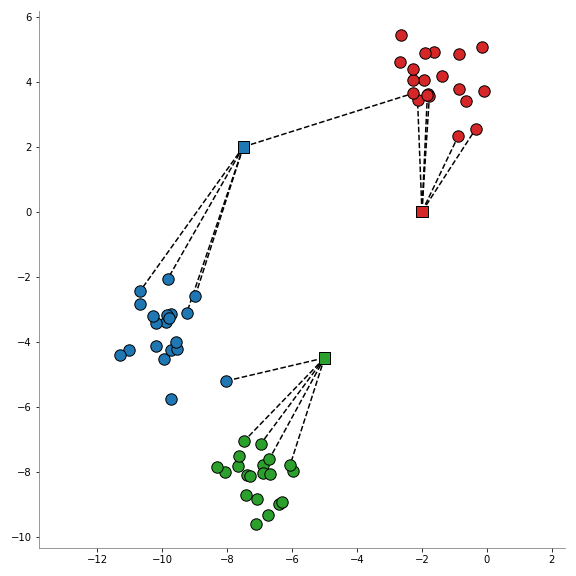

## 6.6.1.1 Métricas de distancia

links: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

## 6.6.1.2 Dataset

In [12]:
#
# Dataset
#
NPOINTS = 60

X, y = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.9,
    shuffle=False,
    random_state=1,
)

X_new = np.array(
    [
        [-7.5, 2],
        [-5, -4.5],
        [-2, 0],
    ]
)

## 6.6.1.3 K-Neighbors Classifier

In [13]:
kneighborsClassifier = KNeighborsClassifier(
    # -----------------------------------------------------
    # Number of neighbors to use by default for kneighbors
    # queries.
    n_neighbors=5,
    # -----------------------------------------------------
    # 'auto', 'ball_tree', 'kd_tree', 'brute'
    algorithm="auto",
)

kneighborsClassifier.fit(X, y)

kneighborsClassifier.predict(X_new)

array([1, 2, 0])

## 6.6.1.4 Radius Neighbors Classifier

In [14]:
radiusNeighborsClassifier = RadiusNeighborsClassifier(
    # -----------------------------------------------------
    # Range of parameter space to use by default for
    # radius_neighbors queries.
    radius=5,
    # -----------------------------------------------------
    # 'auto', 'ball_tree', 'kd_tree', 'brute'
    algorithm="auto",
)

radiusNeighborsClassifier.fit(X, y)

radiusNeighborsClassifier.predict(X_new)

array([1, 2, 0])

## 6.6.1.5 Nearest Centroid Classifier

In [15]:
nearestCentroid = NearestCentroid()

nearestCentroid.fit(X, y)

nearestCentroid.predict(X_new)

array([1, 2, 0])

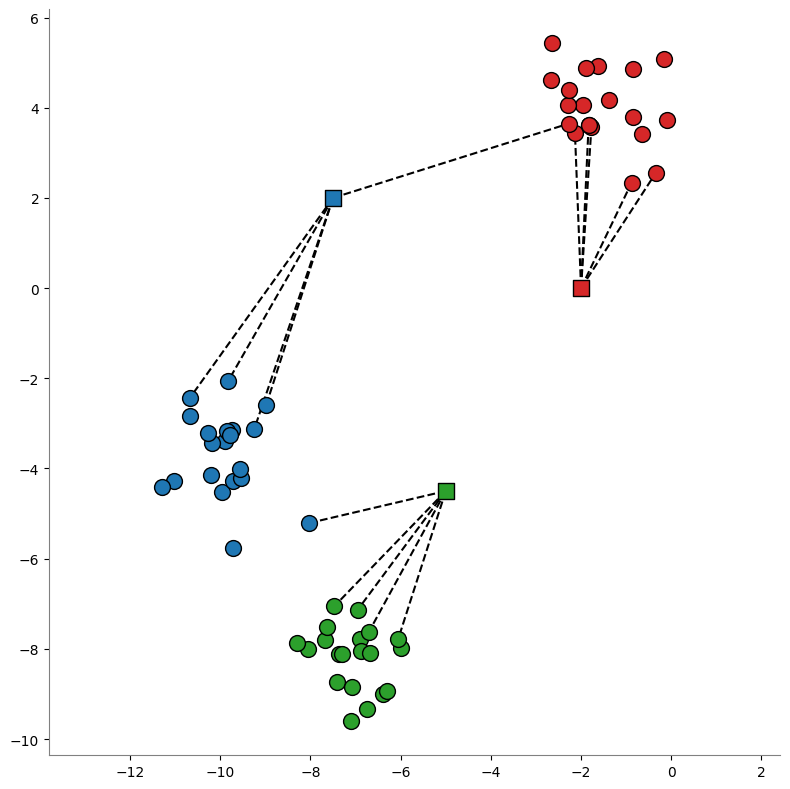

In [16]:
def fig_nearest_neightbors_classifier():

    plt.figure(figsize=(8, 8))
    plt.scatter(X[:20, 0], X[:20, 1], s=130, color="tab:red", edgecolors="k")
    plt.scatter(X[20:40, 0], X[20:40, 1], s=130, color="tab:blue", edgecolors="k")
    plt.scatter(X[40:, 0], X[40:, 1], s=130, color="tab:green", edgecolors="k")
    plt.axis("equal")

    #
    # Puntos de prueba
    #

    colors = ["tab:blue", "tab:green", "tab:red"]
    plt.scatter(
        X_new[:, 0],
        X_new[:, 1],
        marker="s",
        s=130,
        edgecolors="black",
        c=colors,
        zorder=10,
    )

    nearestNeighbors = NearestNeighbors(
        n_neighbors=5,
        algorithm="kd_tree",
    ).fit(X)

    neighbors = nearestNeighbors.kneighbors(X_new, 5, return_distance=False)

    for i_new_point in range(len(X_new)):
        for neighbor in neighbors[i_new_point]:
            plt.plot(
                [X_new[i_new_point][0], X[neighbor, 0]],
                [X_new[i_new_point][1], X[neighbor, 1]],
                "--k",
                zorder=0,
            )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()
    # plt.savefig("images/nearestNeighborsClassifier.png")
    # plt.close()

fig_nearest_neightbors_classifier()

In [17]:
print('ok_')

ok_
